In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib as mpl 
import seaborn as sns 
mpl.rcParams['figure.dpi'] = 400 

In [2]:
from numpy.random import default_rng
rg = default_rng(4)
X_1_pos = rg.uniform(low=1, high=7, size=(20,1))
print(X_1_pos[0:3])
X_1_neg = rg.uniform(low=3, high=10, size=(20,1))
print(X_1_neg[0:3])
X_2_pos = rg.uniform(low=1, high=7, size=(20,1))
print(X_2_pos[0:3])
X_2_neg = rg.uniform(low=3, high=10, size=(20,1))
print(X_2_neg[0:3])

[[6.65833663]
 [4.06796532]
 [6.85746223]]
[[7.93405322]
 [9.59962575]
 [7.65960192]]
[[5.15531227]
 [5.6237829 ]
 [2.14473103]]
[[6.49784918]
 [9.69185251]
 [9.32236912]]


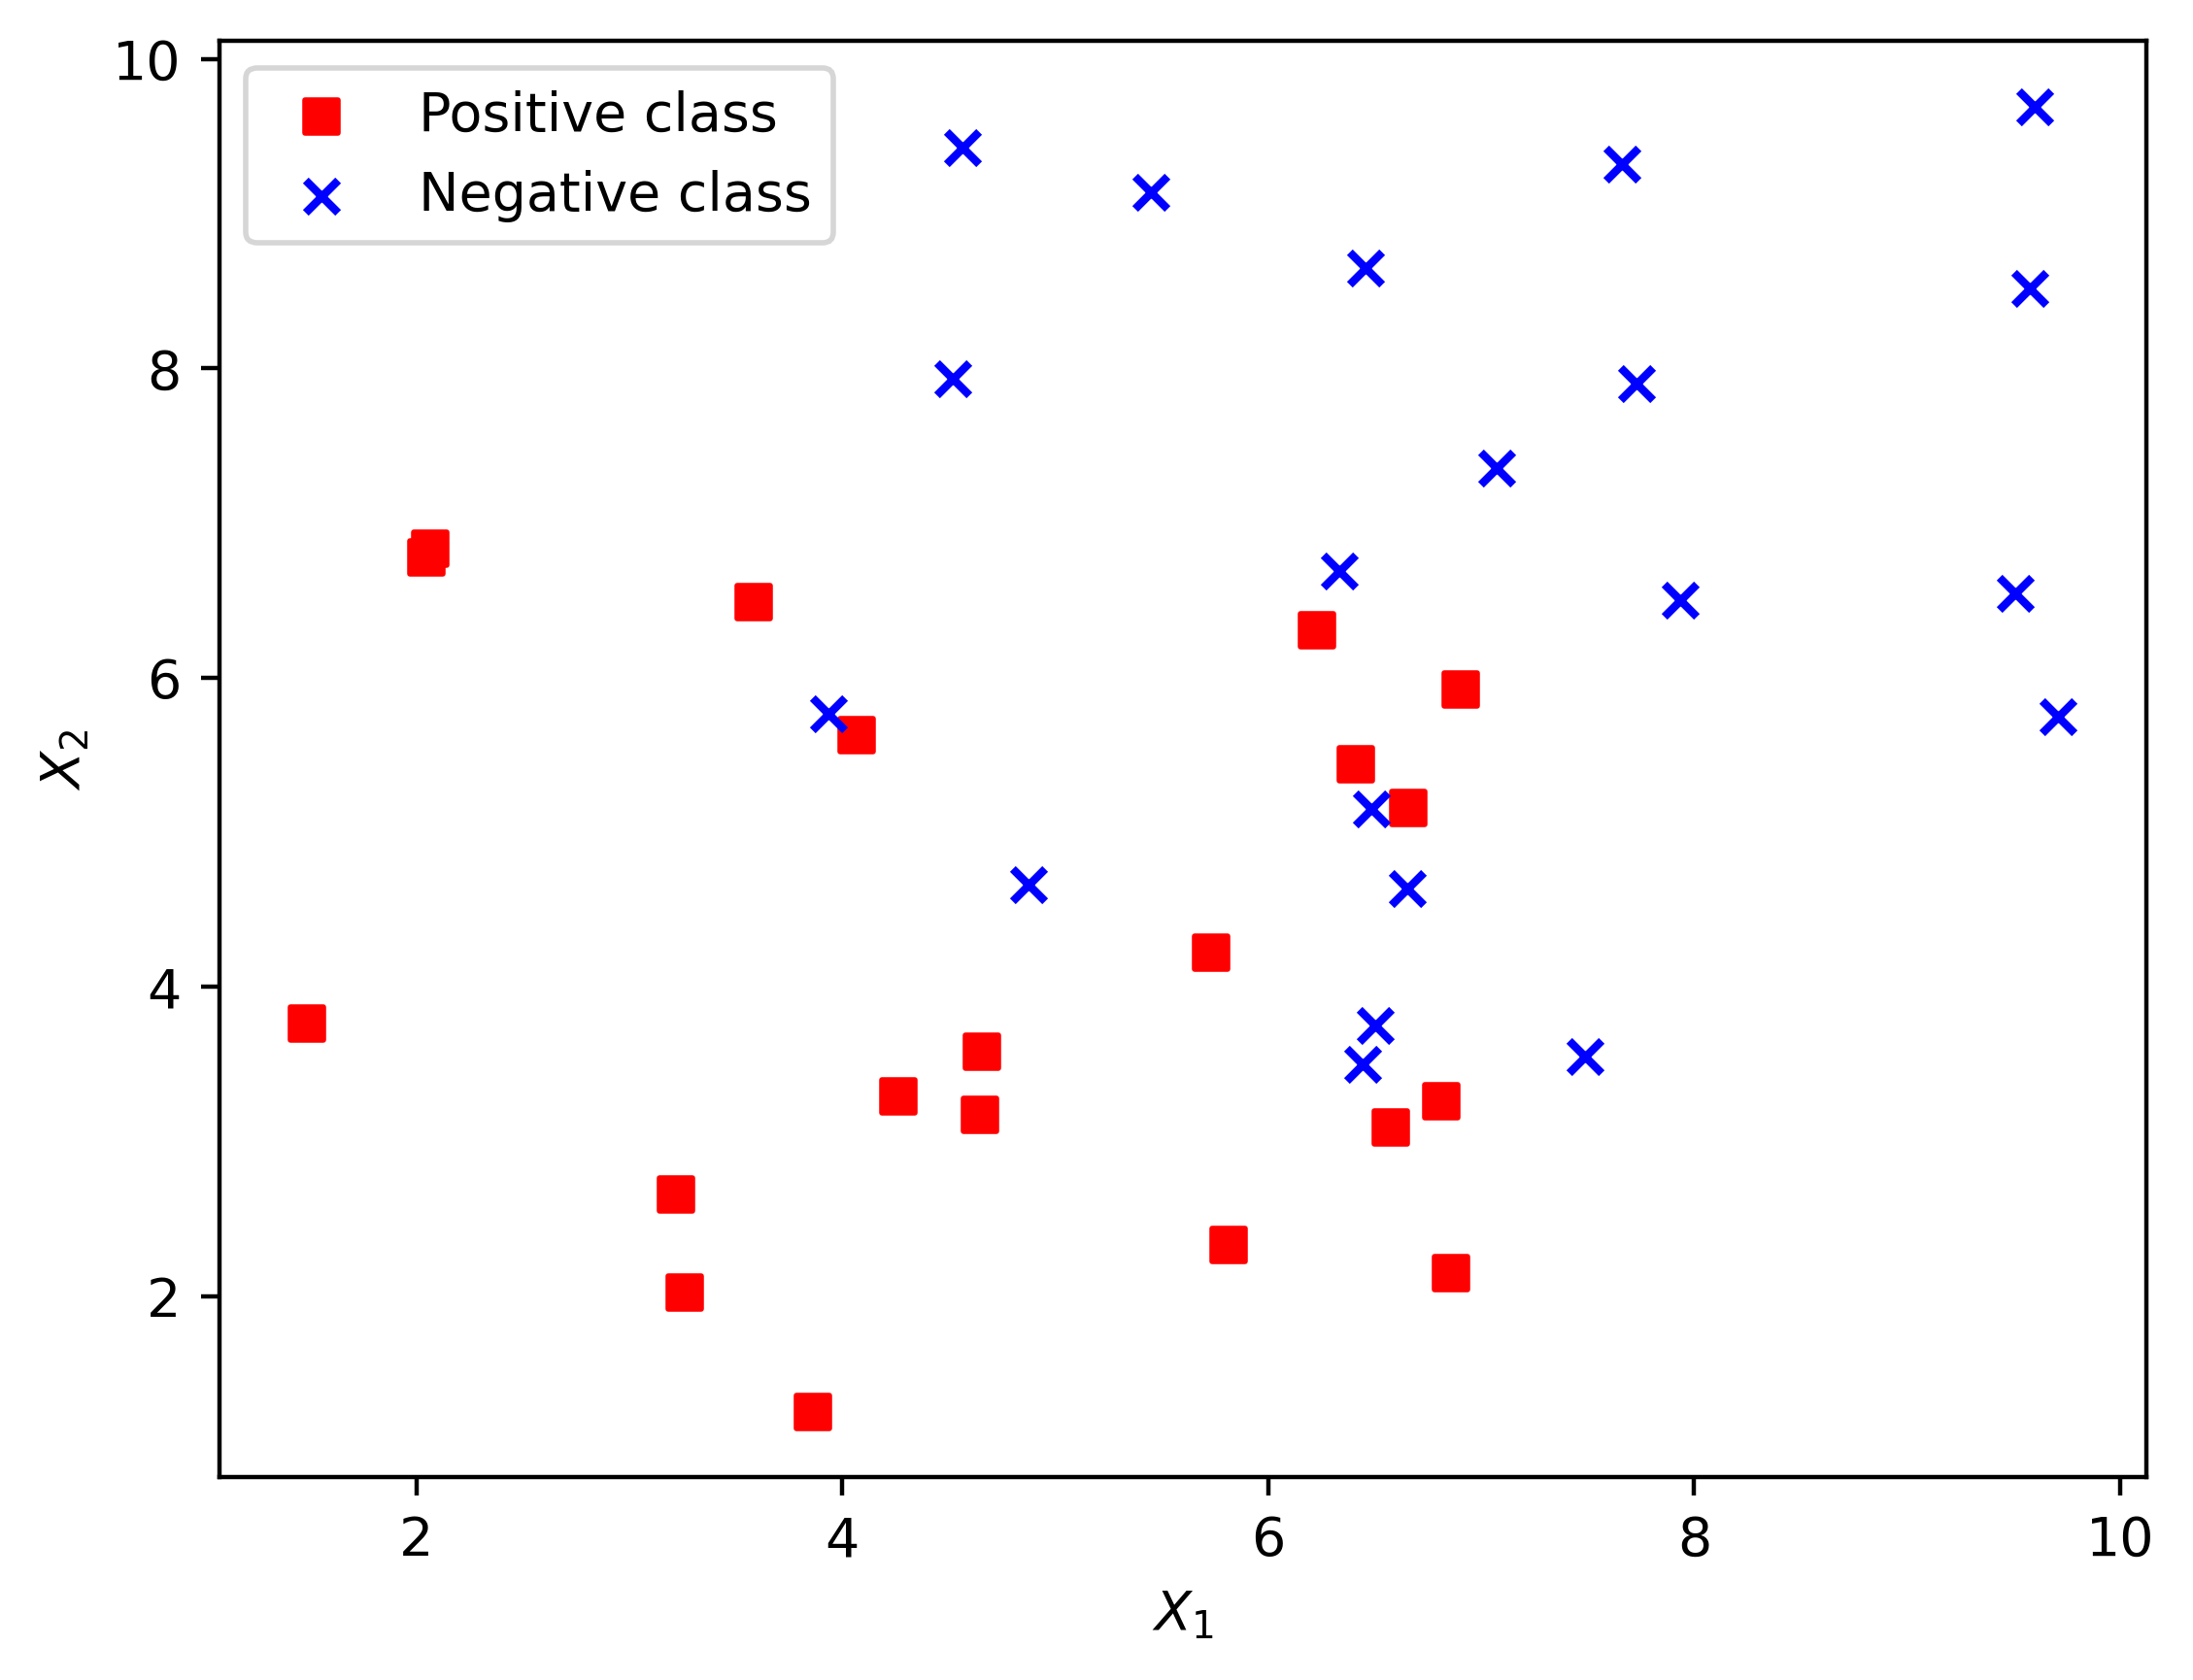

In [3]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='s')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class'])

In [4]:
X = np.block([[X_1_pos, X_2_pos], [X_1_neg, X_2_neg]])
X

array([[6.65833663, 5.15531227],
       [4.06796532, 5.6237829 ],
       [6.85746223, 2.14473103],
       [1.48501614, 3.75949608],
       [4.64413499, 3.17089036],
       [3.25891951, 2.02437892],
       [5.81140724, 2.32810996],
       [2.0471669 , 6.77504447],
       [6.22981165, 6.30533831],
       [4.2636484 , 3.29375096],
       [6.41329048, 5.43683946],
       [3.86292114, 1.25180822],
       [3.58297767, 6.49034321],
       [5.73368031, 4.22302511],
       [6.904918  , 5.92160682],
       [3.21835476, 2.65562955],
       [6.81359722, 3.25674288],
       [6.57415833, 3.08826231],
       [2.06615551, 6.83463801],
       [4.6531097 , 3.5767593 ],
       [7.93405322, 6.49784918],
       [9.59962575, 9.69185251],
       [7.65960192, 9.32236912],
       [3.93377029, 5.76507357],
       [6.48507319, 5.15150544],
       [6.45533884, 8.64933555],
       [6.50158333, 3.75230113],
       [9.710076  , 5.7453224 ],
       [5.4495618 , 9.13503672],
       [4.56639803, 9.4234969 ],
       [6.

In [5]:
print(X.shape)
print(X[0:3])

(40, 2)
[[6.65833663 5.15531227]
 [4.06796532 5.6237829 ]
 [6.85746223 2.14473103]]


In [6]:
y = np.vstack((np.ones((20,1)), np.zeros((20,1)))).reshape(40,)
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [7]:
from sklearn.linear_model import LogisticRegression

In [9]:
example_lr = LogisticRegression(solver='liblinear')
example_lr

LogisticRegression(solver='liblinear')

In [10]:
example_lr.fit(X, y)

LogisticRegression(solver='liblinear')

In [11]:
y_pred = example_lr.predict(X)
y_pred

array([0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0.])

In [12]:
positive_indices = [counter for counter in range(len(y_pred))if y_pred[counter]==1]
positive_indices

[2, 3, 4, 5, 6, 7, 9, 11, 13, 15, 16, 17, 18, 19, 26, 34, 36]

In [14]:
negative_indices = [counter for counter in range(len(y_pred)) if y_pred[counter]==0]
negative_indices

[0,
 1,
 8,
 10,
 12,
 14,
 20,
 21,
 22,
 23,
 24,
 25,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 37,
 38,
 39]

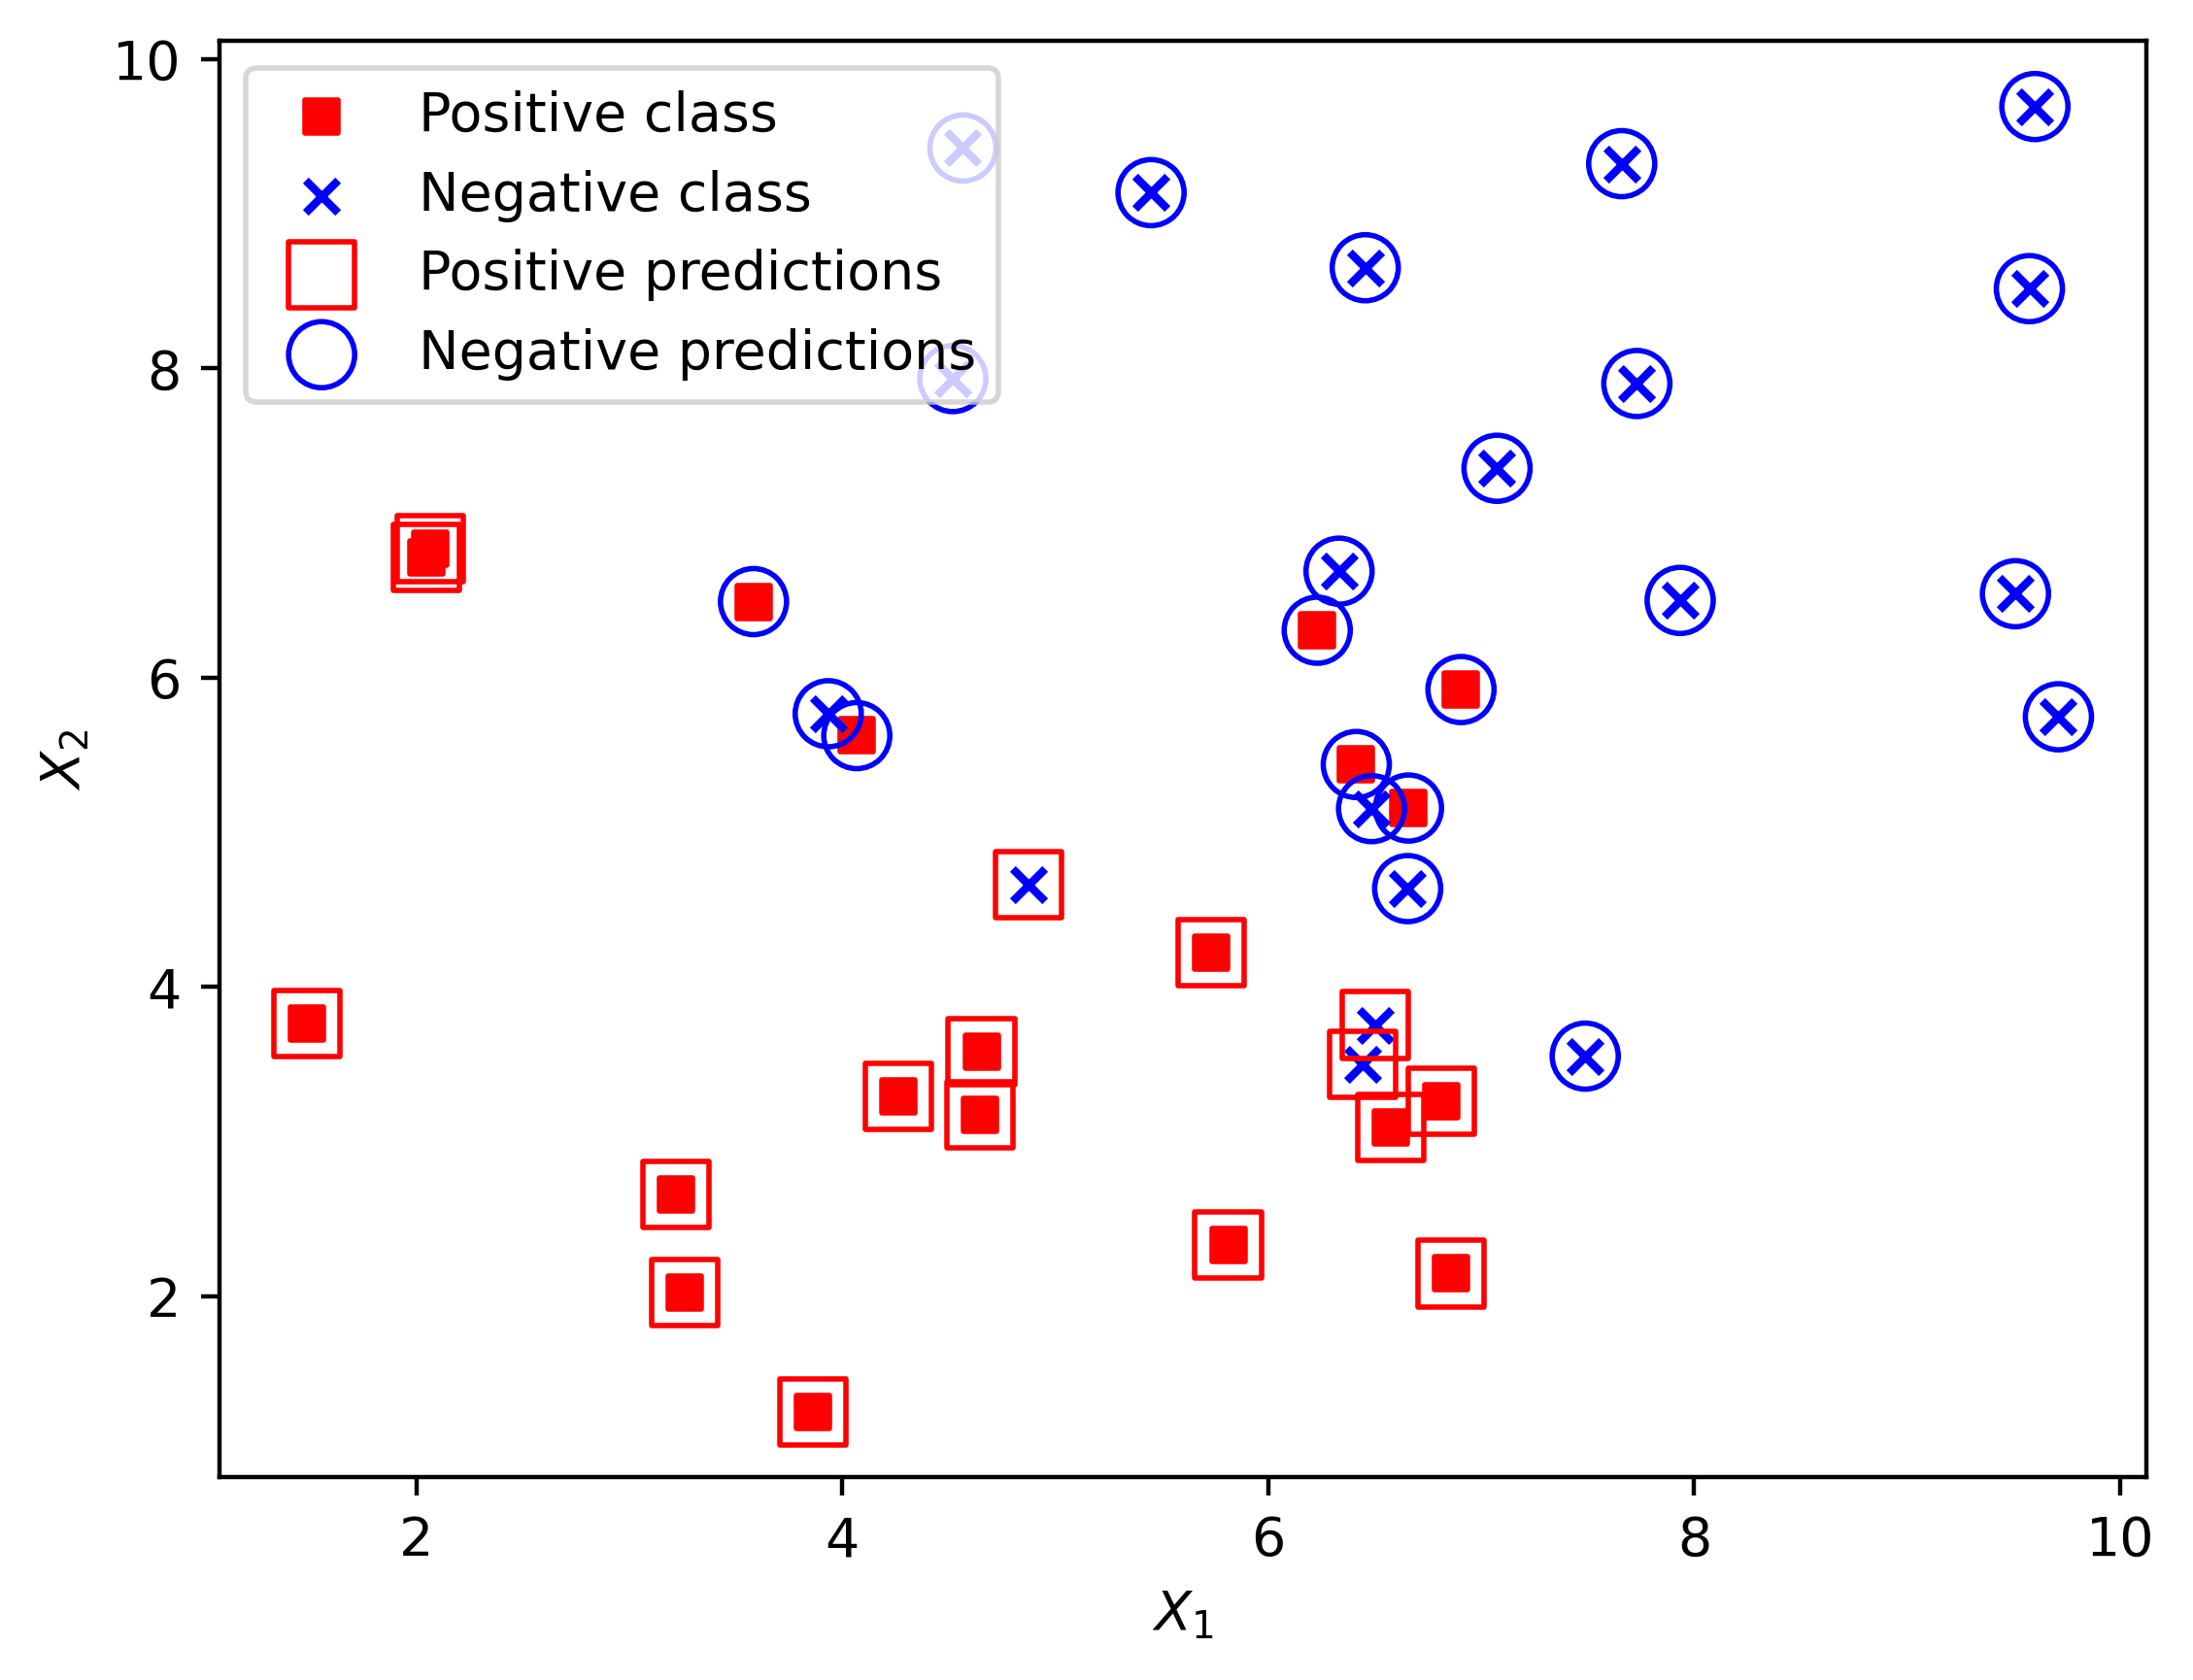

In [16]:
plt.scatter(X_1_pos, X_2_pos, color='red', marker='s')
plt.scatter(X_1_neg, X_2_neg, color='blue', marker='x')
plt.scatter(X[positive_indices,0], X[positive_indices,1], s=150, marker='s', edgecolors='red', facecolors='none')
plt.scatter(X[negative_indices,0], X[negative_indices,1], s=150, marker='o', edgecolors='blue', facecolors='none')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(['Positive class', 'Negative class', 'Positive predictions', 'Negative predictions'])

In [17]:
theta_1 = example_lr.coef_[0][0]
theta_2 = example_lr.coef_[0][1]
print(theta_1, theta_2)

-0.16472042583006552 -0.2567518594997951


In [18]:
example_lr.intercept_

array([2.11271726])

In [20]:
theta_0 = example_lr.intercept_
theta_0

array([2.11271726])

In [22]:
X_1_decision_boundary = np.array([0, 10])
X_1_decision_boundary

array([ 0, 10])

In [23]:
X_2_decision_boundary = -(theta_1/theta_2)*X_1_decision_boundary - (theta_0/theta_2)
X_2_decision_boundary

array([8.22863469, 1.81308521])

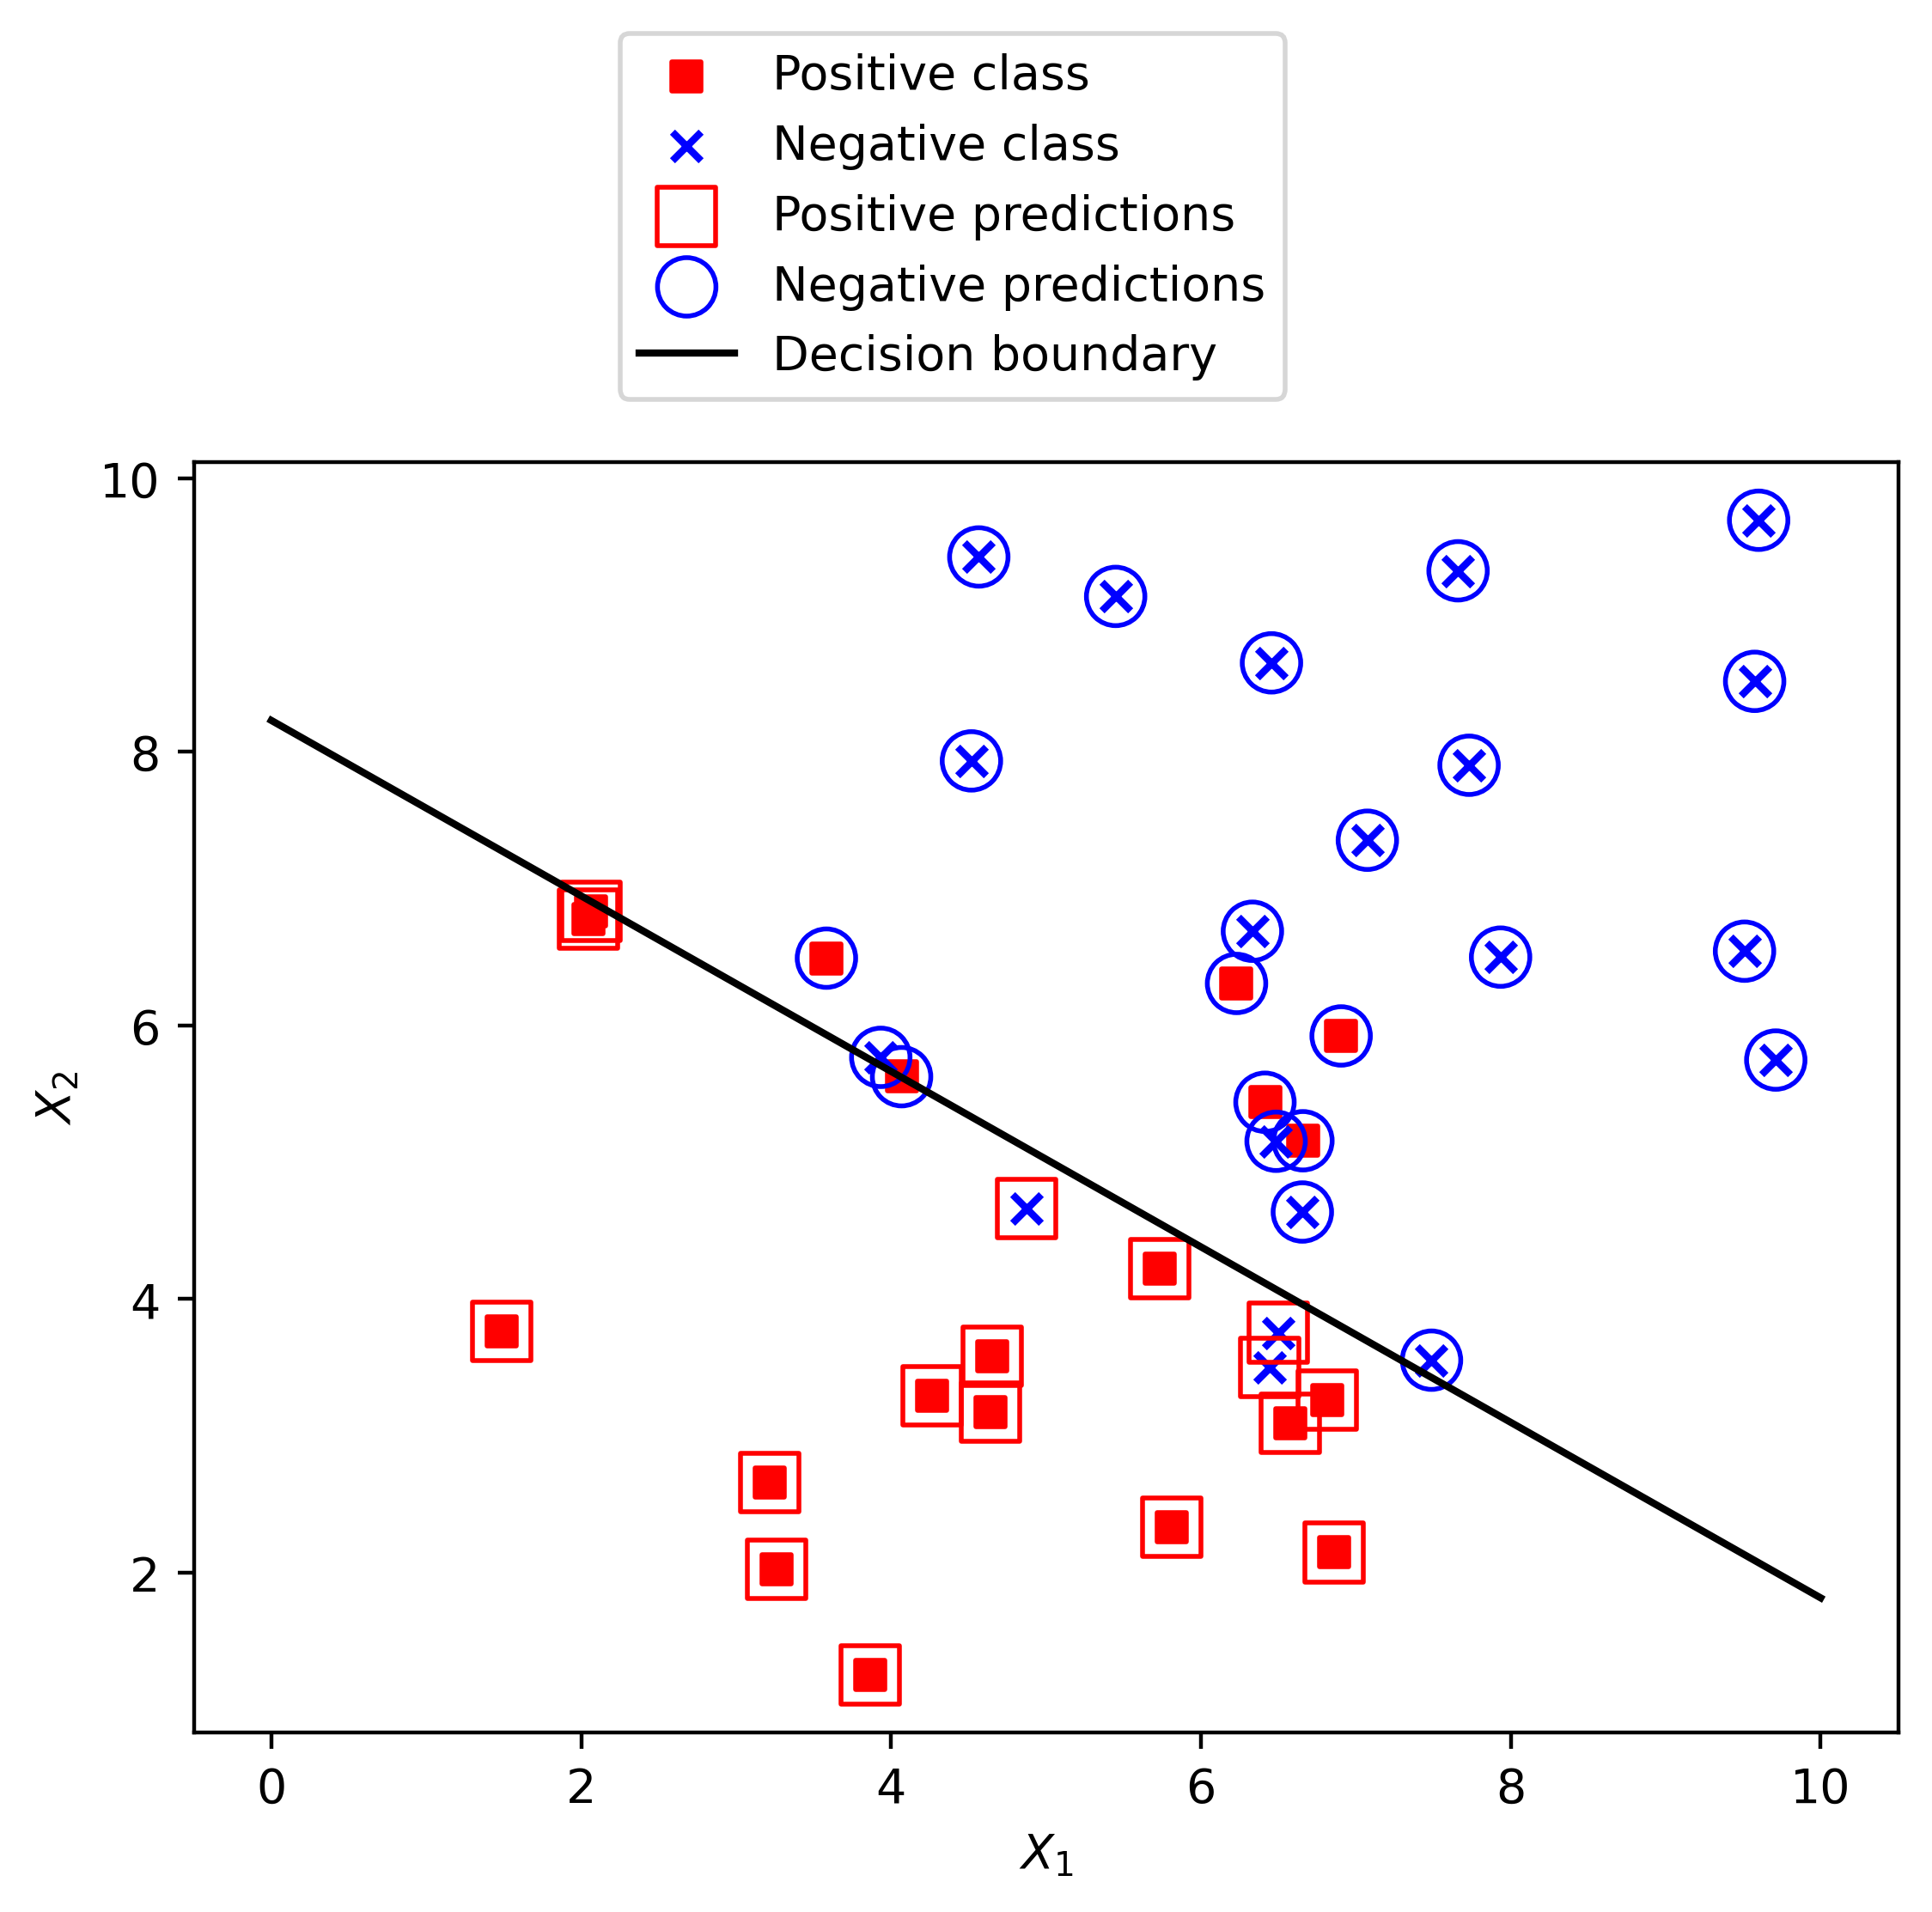

In [24]:
pos_true = plt.scatter(X_1_pos, X_2_pos,
                       color='red', marker='s',
                       label='Positive class')
neg_true = plt.scatter(X_1_neg, X_2_neg,
                       color='blue', marker='x',
                       label='Negative class')
pos_pred = plt.scatter(X[positive_indices,0],
                       X[positive_indices,1],
                       s=150, marker='s',
                       edgecolors='red', facecolors='none',
                       label='Positive predictions')
neg_pred = plt.scatter(X[negative_indices,0],
                       X[negative_indices,1],
                       s=150, marker='o',
                       edgecolors='blue', facecolors='none',
                       label='Negative predictions')
dec = plt.plot(X_1_decision_boundary, X_2_decision_boundary,
               'k-', label='Decision boundary')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend(loc=[0.25, 1.05])